# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#access">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#analyze">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tweepy
import glob
import json
%matplotlib inline


<a id='gathering'></a>
## Data Gathering
In the following cells the Data Gathering processes were done. The data gathering were from three different sources:
1. A CSV file that was provided by Udacity for WeRateDogs Twitter archive (twitter_archive_enhanced.csv)
2. A TSV file that was downloaded programmatically from the Udacity Server
3. Additional data that was retrieved through the Twitter API.

In [2]:
# Read the CSV file to the Dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv',sep =',')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# get the TSV url using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
# Making a directory for predictions if it doesn't already exist
folder_name = 'predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [6]:
# Download the file to the local device
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
# Read the file to a Pandas Dataframe
for predictions in glob.glob('predictions/*.tsv'):
    with open(predictions, encoding='utf-8') as file:
        predictions = pd.read_csv(file, sep='\t')

predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1166,735635087207878657,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,pug,0.891871,True,goose,0.014377,False,fur_coat,0.008451,False
343,672264251789176834,https://pbs.twimg.com/media/CVRcxJ-WsAAXOhO.jpg,1,Chihuahua,0.609860,True,teddy,0.068134,False,Norwich_terrier,0.059227,True
216,670061506722140161,https://pbs.twimg.com/media/CUyJYk1WoAMPROb.jpg,1,Italian_greyhound,0.329339,True,American_Staffordshire_terrier,0.305294,True,whippet,0.111686,True


In [ ]:
# Saving the predictions to a CSV file for Visual assessment on excel
predictions.to_csv('predictions.csv', index=False)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
# immport all required information for tweepy
#import tweepy

consumer_key = 'sBAaMUEVs4QTc2jtYKCHlEv4s'
consumer_secret = 'Ime3L9Ado6u7FoPLojKI40O5PwJOL2gKCg3EQp1GuFvT3mfn3H'
access_token = '709209466-w3q2AR4c3BZro440ngcaXXkmPAhjZD51MKdoiUTM'
access_secret = '5637wNWOyjmHIFwFIJg9d3uxBhACMxwYc0tSeFIPkfZrf'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [9]:
# Testing the API for one file
api.get_status(712668654853337088)

Status(_api=<tweepy.api.API object at 0x000001C8153800D0>, _json={'created_at': 'Wed Mar 23 15:53:42 +0000 2016', 'id': 712668654853337088, 'id_str': '712668654853337088', 'text': 'Say hello to Sunny and Roxy. They pull things out of water together. 10/10 for both https://t.co/88aedAmxcl', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 712668618841042948, 'id_str': '712668618841042948', 'indices': [84, 107], 'media_url': 'http://pbs.twimg.com/media/CePoVTyWsAQEz1g.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CePoVTyWsAQEz1g.jpg', 'url': 'https://t.co/88aedAmxcl', 'display_url': 'pic.twitter.com/88aedAmxcl', 'expanded_url': 'https://twitter.com/dog_rates/status/712668654853337088/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 574, 'h': 554, 'resize': 'fit'}, 'small': {'w': 574, 'h': 554, 'resize': 'fit'}, 'large': {'w': 574, 'h': 554, 'resize': 'fit'}}}]}, '

In [10]:
# Adding the tweet_id on twitter archives to a list 
tweet_list = list(twitter_archive.tweet_id)

In [12]:
# Downloading the tweets in the tweet_list and saving in tweet_json.txt
import time
start = time.time()
tweet_errors = []
count = 0
with open ('tweet_json.txt', 'w') as json_file:
    for tweetid in tweet_list:
        try:
            tweet = api.get_status(tweetid, tweet_mode='extended')
            json.dump(tweet._json, json_file)
            json_file.write('\n')
            count += 1
# Count of Tweets queried    
            print ('Done with tweet_id: {} \n{} out of {}'.format(tweetid, count, len(tweet_list)))
        
        except:
            tweet_errors.append(tweetid)
end = time.time()
print(end - start)

Done with tweet_id: 892420643555336193 
1 out of 2356
Done with tweet_id: 892177421306343426 
2 out of 2356
Done with tweet_id: 891815181378084864 
3 out of 2356
Done with tweet_id: 891689557279858688 
4 out of 2356
Done with tweet_id: 891327558926688256 
5 out of 2356
Done with tweet_id: 891087950875897856 
6 out of 2356
Done with tweet_id: 890971913173991426 
7 out of 2356
Done with tweet_id: 890729181411237888 
8 out of 2356
Done with tweet_id: 890609185150312448 
9 out of 2356
Done with tweet_id: 890240255349198849 
10 out of 2356
Done with tweet_id: 890006608113172480 
11 out of 2356
Done with tweet_id: 889880896479866881 
12 out of 2356
Done with tweet_id: 889665388333682689 
13 out of 2356
Done with tweet_id: 889638837579907072 
14 out of 2356
Done with tweet_id: 889531135344209921 
15 out of 2356
Done with tweet_id: 889278841981685760 
16 out of 2356
Done with tweet_id: 888917238123831296 
17 out of 2356
Done with tweet_id: 888804989199671297 
18 out of 2356
Done with tweet_id:

Done with tweet_id: 861383897657036800 
150 out of 2356
Done with tweet_id: 861288531465048066 
151 out of 2356
Done with tweet_id: 861005113778896900 
152 out of 2356
Done with tweet_id: 860981674716409858 
153 out of 2356
Done with tweet_id: 860924035999428608 
154 out of 2356
Done with tweet_id: 860563773140209665 
155 out of 2356
Done with tweet_id: 860524505164394496 
156 out of 2356
Done with tweet_id: 860276583193509888 
157 out of 2356
Done with tweet_id: 860184849394610176 
158 out of 2356
Done with tweet_id: 860177593139703809 
159 out of 2356
Done with tweet_id: 859924526012018688 
160 out of 2356
Done with tweet_id: 859851578198683649 
161 out of 2356
Done with tweet_id: 859607811541651456 
162 out of 2356
Done with tweet_id: 859196978902773760 
163 out of 2356
Done with tweet_id: 859074603037188101 
164 out of 2356
Done with tweet_id: 858860390427611136 
165 out of 2356
Done with tweet_id: 858843525470990336 
166 out of 2356
Done with tweet_id: 858471635011153920 
167 out 

Done with tweet_id: 835264098648616962 
297 out of 2356
Done with tweet_id: 835246439529840640 
298 out of 2356
Done with tweet_id: 835172783151792128 
299 out of 2356
Done with tweet_id: 835152434251116546 
300 out of 2356
Done with tweet_id: 834931633769889797 
301 out of 2356
Done with tweet_id: 834786237630337024 
302 out of 2356
Done with tweet_id: 834574053763584002 
303 out of 2356
Done with tweet_id: 834477809192075265 
304 out of 2356
Done with tweet_id: 834458053273591808 
305 out of 2356
Done with tweet_id: 834209720923721728 
306 out of 2356
Done with tweet_id: 834167344700198914 
307 out of 2356
Done with tweet_id: 834089966724603904 
308 out of 2356
Done with tweet_id: 834086379323871233 
309 out of 2356
Done with tweet_id: 833863086058651648 
310 out of 2356
Done with tweet_id: 833826103416520705 
311 out of 2356
Done with tweet_id: 833732339549220864 
312 out of 2356
Done with tweet_id: 833722901757046785 
313 out of 2356
Done with tweet_id: 833479644947025920 
314 out 

Done with tweet_id: 817536400337801217 
444 out of 2356
Done with tweet_id: 817502432452313088 
445 out of 2356
Done with tweet_id: 817423860136083457 
446 out of 2356
Done with tweet_id: 817415592588222464 
447 out of 2356
Done with tweet_id: 817181837579653120 
448 out of 2356
Done with tweet_id: 817171292965273600 
449 out of 2356
Done with tweet_id: 817120970343411712 
450 out of 2356
Done with tweet_id: 817056546584727552 
451 out of 2356
Done with tweet_id: 816829038950027264 
452 out of 2356
Done with tweet_id: 816816676327063552 
453 out of 2356
Done with tweet_id: 816697700272001025 
454 out of 2356
Done with tweet_id: 816450570814898180 
455 out of 2356
Done with tweet_id: 816336735214911488 
456 out of 2356
Done with tweet_id: 816091915477250048 
457 out of 2356
Done with tweet_id: 816062466425819140 
458 out of 2356
Done with tweet_id: 816014286006976512 
459 out of 2356
Done with tweet_id: 815990720817401858 
460 out of 2356
Done with tweet_id: 815966073409433600 
461 out 

Done with tweet_id: 797236660651966464 
591 out of 2356
Done with tweet_id: 797165961484890113 
592 out of 2356
Done with tweet_id: 796904159865868288 
593 out of 2356
Done with tweet_id: 796865951799083009 
594 out of 2356
Done with tweet_id: 796759840936919040 
595 out of 2356
Done with tweet_id: 796563435802726400 
596 out of 2356
Done with tweet_id: 796484825502875648 
597 out of 2356
Done with tweet_id: 796387464403357696 
598 out of 2356
Done with tweet_id: 796177847564038144 
599 out of 2356
Done with tweet_id: 796149749086875649 
600 out of 2356
Done with tweet_id: 796125600683540480 
601 out of 2356
Done with tweet_id: 796116448414461957 
602 out of 2356
Done with tweet_id: 796080075804475393 
603 out of 2356
Done with tweet_id: 796031486298386433 
604 out of 2356
Done with tweet_id: 795464331001561088 
605 out of 2356
Done with tweet_id: 795400264262053889 
606 out of 2356
Done with tweet_id: 795076730285391872 
607 out of 2356
Done with tweet_id: 794983741416415232 
608 out 

Done with tweet_id: 778408200802557953 
738 out of 2356
Done with tweet_id: 778396591732486144 
739 out of 2356
Done with tweet_id: 778383385161035776 
740 out of 2356
Done with tweet_id: 778286810187399168 
741 out of 2356
Done with tweet_id: 778039087836069888 
742 out of 2356
Done with tweet_id: 778027034220126208 
743 out of 2356
Done with tweet_id: 777953400541634568 
744 out of 2356
Done with tweet_id: 777885040357281792 
745 out of 2356
Done with tweet_id: 777684233540206592 
746 out of 2356
Done with tweet_id: 777641927919427584 
747 out of 2356
Done with tweet_id: 777621514455814149 
748 out of 2356
Done with tweet_id: 777189768882946048 
749 out of 2356
Done with tweet_id: 776819012571455488 
750 out of 2356
Done with tweet_id: 776813020089548800 
751 out of 2356
Done with tweet_id: 776477788987613185 
752 out of 2356
Done with tweet_id: 776249906839351296 
753 out of 2356
Done with tweet_id: 776218204058357768 
754 out of 2356
Done with tweet_id: 776201521193218049 
755 out 

Done with tweet_id: 757597904299253760 
885 out of 2356
Done with tweet_id: 757596066325864448 
886 out of 2356
Done with tweet_id: 757400162377592832 
887 out of 2356
Done with tweet_id: 757393109802180609 
888 out of 2356
Done with tweet_id: 757354760399941633 
889 out of 2356
Done with tweet_id: 756998049151549440 
890 out of 2356
Done with tweet_id: 756939218950160384 
891 out of 2356
Done with tweet_id: 756651752796094464 
892 out of 2356
Done with tweet_id: 756526248105566208 
893 out of 2356
Done with tweet_id: 756303284449767430 
894 out of 2356
Done with tweet_id: 756288534030475264 
895 out of 2356
Done with tweet_id: 756275833623502848 
896 out of 2356
Done with tweet_id: 755955933503782912 
897 out of 2356
Done with tweet_id: 755206590534418437 
898 out of 2356
Done with tweet_id: 755110668769038337 
899 out of 2356
Done with tweet_id: 754874841593970688 
900 out of 2356
Done with tweet_id: 754856583969079297 
901 out of 2356
Done with tweet_id: 754747087846248448 
902 out 

Done with tweet_id: 741793263812808706 
1031 out of 2356
Done with tweet_id: 741743634094141440 
1032 out of 2356
Done with tweet_id: 741438259667034112 
1033 out of 2356
Done with tweet_id: 741303864243200000 
1034 out of 2356
Done with tweet_id: 741099773336379392 
1035 out of 2356
Done with tweet_id: 741067306818797568 
1036 out of 2356
Done with tweet_id: 740995100998766593 
1037 out of 2356
Done with tweet_id: 740711788199743490 
1038 out of 2356
Done with tweet_id: 740699697422163968 
1039 out of 2356
Done with tweet_id: 740676976021798912 
1040 out of 2356
Done with tweet_id: 740373189193256964 
1041 out of 2356
Done with tweet_id: 740365076218183684 
1042 out of 2356
Done with tweet_id: 740359016048689152 
1043 out of 2356
Done with tweet_id: 740214038584557568 
1044 out of 2356
Done with tweet_id: 739979191639244800 
1045 out of 2356
Done with tweet_id: 739932936087216128 
1046 out of 2356
Done with tweet_id: 739844404073074688 
1047 out of 2356
Done with tweet_id: 73962356981

Done with tweet_id: 716439118184652801 
1175 out of 2356
Done with tweet_id: 716285507865542656 
1176 out of 2356
Done with tweet_id: 716080869887381504 
1177 out of 2356
Done with tweet_id: 715928423106027520 
1178 out of 2356
Done with tweet_id: 715758151270801409 
1179 out of 2356
Done with tweet_id: 715733265223708672 
1180 out of 2356
Done with tweet_id: 715704790270025728 
1181 out of 2356
Done with tweet_id: 715696743237730304 
1182 out of 2356
Done with tweet_id: 715680795826982913 
1183 out of 2356
Done with tweet_id: 715360349751484417 
1184 out of 2356
Done with tweet_id: 715342466308784130 
1185 out of 2356
Done with tweet_id: 715220193576927233 
1186 out of 2356
Done with tweet_id: 715200624753819648 
1187 out of 2356
Done with tweet_id: 715009755312439296 
1188 out of 2356
Done with tweet_id: 714982300363173890 
1189 out of 2356
Done with tweet_id: 714962719905021952 
1190 out of 2356
Done with tweet_id: 714957620017307648 
1191 out of 2356
Done with tweet_id: 71463157661

Done with tweet_id: 704480331685040129 
1319 out of 2356
Done with tweet_id: 704364645503647744 
1320 out of 2356
Done with tweet_id: 704347321748819968 
1321 out of 2356
Done with tweet_id: 704134088924532736 
1322 out of 2356
Done with tweet_id: 704113298707505153 
1323 out of 2356
Done with tweet_id: 704054845121142784 
1324 out of 2356
Done with tweet_id: 703774238772166656 
1325 out of 2356
Done with tweet_id: 703769065844768768 
1326 out of 2356
Done with tweet_id: 703631701117943808 
1327 out of 2356
Done with tweet_id: 703611486317502464 
1328 out of 2356
Done with tweet_id: 703425003149250560 
1329 out of 2356
Done with tweet_id: 703407252292673536 
1330 out of 2356
Done with tweet_id: 703382836347330562 
1331 out of 2356
Done with tweet_id: 703356393781329922 
1332 out of 2356
Done with tweet_id: 703268521220972544 
1333 out of 2356
Done with tweet_id: 703079050210877440 
1334 out of 2356
Done with tweet_id: 703041949650034688 
1335 out of 2356
Done with tweet_id: 70293212749

Done with tweet_id: 692901601640583168 
1463 out of 2356
Done with tweet_id: 692894228850999298 
1464 out of 2356
Done with tweet_id: 692828166163931137 
1465 out of 2356
Done with tweet_id: 692752401762250755 
1466 out of 2356
Done with tweet_id: 692568918515392513 
1467 out of 2356
Done with tweet_id: 692535307825213440 
1468 out of 2356
Done with tweet_id: 692530551048294401 
1469 out of 2356
Done with tweet_id: 692423280028966913 
1470 out of 2356
Done with tweet_id: 692417313023332352 
1471 out of 2356
Done with tweet_id: 692187005137076224 
1472 out of 2356
Done with tweet_id: 692158366030913536 
1473 out of 2356
Done with tweet_id: 692142790915014657 
1474 out of 2356
Done with tweet_id: 692041934689402880 
1475 out of 2356
Done with tweet_id: 692017291282812928 
1476 out of 2356
Done with tweet_id: 691820333922455552 
1477 out of 2356
Done with tweet_id: 691793053716221953 
1478 out of 2356
Done with tweet_id: 691756958957883396 
1479 out of 2356
Done with tweet_id: 69167565221

Done with tweet_id: 684225744407494656 
1607 out of 2356
Done with tweet_id: 684222868335505415 
1608 out of 2356
Done with tweet_id: 684200372118904832 
1609 out of 2356
Done with tweet_id: 684195085588783105 
1610 out of 2356
Done with tweet_id: 684188786104872960 
1611 out of 2356
Done with tweet_id: 684177701129875456 
1612 out of 2356
Done with tweet_id: 684147889187209216 
1613 out of 2356
Done with tweet_id: 684122891630342144 
1614 out of 2356
Done with tweet_id: 684097758874210310 
1615 out of 2356
Done with tweet_id: 683857920510050305 
1616 out of 2356
Done with tweet_id: 683852578183077888 
1617 out of 2356
Done with tweet_id: 683849932751646720 
1618 out of 2356
Done with tweet_id: 683834909291606017 
1619 out of 2356
Done with tweet_id: 683828599284170753 
1620 out of 2356
Done with tweet_id: 683773439333797890 
1621 out of 2356
Done with tweet_id: 683742671509258241 
1622 out of 2356
Done with tweet_id: 683515932363329536 
1623 out of 2356
Done with tweet_id: 68349832257

Done with tweet_id: 677700003327029250 
1751 out of 2356
Done with tweet_id: 677698403548192770 
1752 out of 2356
Done with tweet_id: 677687604918272002 
1753 out of 2356
Done with tweet_id: 677673981332312066 
1754 out of 2356
Done with tweet_id: 677662372920729601 
1755 out of 2356
Done with tweet_id: 677644091929329666 
1756 out of 2356
Done with tweet_id: 677573743309385728 
1757 out of 2356
Done with tweet_id: 677565715327688705 
1758 out of 2356
Done with tweet_id: 677557565589463040 
1759 out of 2356
Done with tweet_id: 677547928504967168 
1760 out of 2356
Done with tweet_id: 677530072887205888 
1761 out of 2356
Done with tweet_id: 677335745548390400 
1762 out of 2356
Done with tweet_id: 677334615166730240 
1763 out of 2356
Done with tweet_id: 677331501395156992 
1764 out of 2356
Done with tweet_id: 677328882937298944 
1765 out of 2356
Done with tweet_id: 677314812125323265 
1766 out of 2356
Done with tweet_id: 677301033169788928 
1767 out of 2356
Done with tweet_id: 67726928170

Done with tweet_id: 674075285688614912 
1895 out of 2356
Done with tweet_id: 674063288070742018 
1896 out of 2356
Done with tweet_id: 674053186244734976 
1897 out of 2356
Done with tweet_id: 674051556661161984 
1898 out of 2356
Done with tweet_id: 674045139690631169 
1899 out of 2356
Done with tweet_id: 674042553264685056 
1900 out of 2356
Done with tweet_id: 674038233588723717 
1901 out of 2356
Done with tweet_id: 674036086168010753 
1902 out of 2356
Done with tweet_id: 674024893172875264 
1903 out of 2356
Done with tweet_id: 674019345211760640 
1904 out of 2356
Done with tweet_id: 674014384960745472 
1905 out of 2356
Done with tweet_id: 674008982932058114 
1906 out of 2356
Done with tweet_id: 673956914389192708 
1907 out of 2356
Done with tweet_id: 673919437611909120 
1908 out of 2356
Done with tweet_id: 673906403526995968 
1909 out of 2356
Done with tweet_id: 673887867907739649 
1910 out of 2356
Done with tweet_id: 673716320723169284 
1911 out of 2356
Done with tweet_id: 67371586185

Done with tweet_id: 671138694582165504 
2039 out of 2356
Done with tweet_id: 671134062904504320 
2040 out of 2356
Done with tweet_id: 671122204919246848 
2041 out of 2356
Done with tweet_id: 671115716440031232 
2042 out of 2356
Done with tweet_id: 671109016219725825 
2043 out of 2356
Done with tweet_id: 670995969505435648 
2044 out of 2356
Done with tweet_id: 670842764863651840 
2045 out of 2356
Done with tweet_id: 670840546554966016 
2046 out of 2356
Done with tweet_id: 670838202509447168 
2047 out of 2356
Done with tweet_id: 670833812859932673 
2048 out of 2356
Done with tweet_id: 670832455012716544 
2049 out of 2356
Done with tweet_id: 670826280409919488 
2050 out of 2356
Done with tweet_id: 670823764196741120 
2051 out of 2356
Done with tweet_id: 670822709593571328 
2052 out of 2356
Done with tweet_id: 670815497391357952 
2053 out of 2356
Done with tweet_id: 670811965569282048 
2054 out of 2356
Done with tweet_id: 670807719151067136 
2055 out of 2356
Done with tweet_id: 67080460170

Done with tweet_id: 668587383441514497 
2183 out of 2356
Done with tweet_id: 668567822092664832 
2184 out of 2356
Done with tweet_id: 668544745690562560 
2185 out of 2356
Done with tweet_id: 668542336805281792 
2186 out of 2356
Done with tweet_id: 668537837512433665 
2187 out of 2356
Done with tweet_id: 668528771708952576 
2188 out of 2356
Done with tweet_id: 668507509523615744 
2189 out of 2356
Done with tweet_id: 668496999348633600 
2190 out of 2356
Done with tweet_id: 668484198282485761 
2191 out of 2356
Done with tweet_id: 668480044826800133 
2192 out of 2356
Done with tweet_id: 668466899341221888 
2193 out of 2356
Done with tweet_id: 668297328638447616 
2194 out of 2356
Done with tweet_id: 668291999406125056 
2195 out of 2356
Done with tweet_id: 668286279830867968 
2196 out of 2356
Done with tweet_id: 668274247790391296 
2197 out of 2356
Done with tweet_id: 668268907921326080 
2198 out of 2356
Done with tweet_id: 668256321989451776 
2199 out of 2356
Done with tweet_id: 66824847237

In [8]:
# Reading the file line by line to a DataFrame.
json_list = []
with open ('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        tweet_id = json_data['id']
        retweet_count = json_data['retweet_count']
        favorite_count = json_data['favorite_count']
#        print(favorite_count)
#        break

        # Append to list of dictionaries
        json_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

twitter_additions = pd.DataFrame(json_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [9]:
# confirm the additional files
twitter_additions.sample(5)

,tweet_id,retweet_count,favorite_count
1567,686358356425093120,602,1998
1650,682047327939461121,848,2952
297,835246439529840640,63,1991
176,856526610513747968,1654,10829
1320,704347321748819968,314,1449


In [10]:
# saving the additional files to a csv file for Visual Assesment on Excel.
twitter_additions.to_csv('twitter_additions.csv',index=False)

<a id='assess'></a>
## Assessing Data
In this section, assessment was done on our datasets for any Quality and Tidiness issues. These issues were recorded to be Cleaned later.
>Assessment was done visually and programmatically. 



In [11]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1682,681891461017812993,NaN,NaN,2015-12-29 17:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Charlie. He's scholarly af. Quite...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681891461...,10,10,Charlie,None,None,pupper,None
633,793845145112371200,NaN,NaN,2016-11-02 16:00:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He was just caught wearing pant...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793845145...,13,10,Clark,None,None,None,None
650,792883833364439040,NaN,NaN,2016-10-31 00:20:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She's rather h*ckin hype for H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792883833...,12,10,Bailey,None,None,None,None
236,847251039262605312,NaN,NaN,2017-03-30 00:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Furzey. He's doing an elevated sandy z...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847251039...,12,10,Furzey,None,None,None,None
689,787717603741622272,NaN,NaN,2016-10-16 18:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,None,None,None,puppo


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [14]:
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [15]:
# crosschecking an issue that was noticed during the visual assessment
twitter_archive[twitter_archive["rating_numerator"] == 420]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [16]:
# Checking for duplicates
sum(twitter_archive.duplicated())

0

In [17]:
sum(twitter_archive.tweet_id.duplicated())

0

In [18]:
predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
138,668537837512433665,https://pbs.twimg.com/media/CUcfnWlWsAAzlwE.jpg,1,Lakeland_terrier,0.372988,True,toy_poodle,0.250445,True,Chihuahua,0.189737,True
791,690690673629138944,https://pbs.twimg.com/media/CZXTgKkWwAA5UZJ.jpg,1,bath_towel,0.194532,False,radiator,0.127776,False,Maltese_dog,0.089625,True
410,673887867907739649,https://pbs.twimg.com/media/CVoha_IU4AAZ7vi.jpg,2,Brabancon_griffon,0.216767,True,Chihuahua,0.190958,True,golden_retriever,0.163288,True
340,672248013293752320,https://pbs.twimg.com/media/CVROAIfWsAECA5t.jpg,1,Irish_terrier,0.413173,True,Airedale,0.335616,True,toy_poodle,0.027952,True
1895,850019790995546112,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,3,Shetland_sheepdog,0.759907,True,collie,0.107405,True,Pembroke,0.052335,True
823,693155686491000832,https://pbs.twimg.com/media/CZ6VatdWwAAwHly.jpg,3,Shih-Tzu,0.697480,True,Lhasa,0.200151,True,Tibetan_terrier,0.090970,True
223,670303360680108032,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,1,Shetland_sheepdog,0.380278,True,Cardigan,0.342806,True,guinea_pig,0.156249,False
1654,810254108431155201,https://pbs.twimg.com/media/Cz6Z0DgWIAAfdvp.jpg,1,Staffordshire_bullterrier,0.292556,True,American_Staffordshire_terrier,0.261233,True,Border_terrier,0.062375,True
1872,844979544864018432,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,3,tennis_ball,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True


In [19]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
# Checking for duplicates
sum(predictions.duplicated())

0

In [11]:
twitter_additions.sample(10)

,tweet_id,retweet_count,favorite_count
1768,677228873407442944,1467,3210
1019,743510151680958465,3419,7417
2273,666996132027977728,79,214
912,753026973505581056,877,3658
1411,696894894812565505,620,2172
1731,678675843183484930,1320,2606
132,865718153858494464,4845,22929
2158,668975677807423489,496,1156
1251,708845821941387268,806,2744
804,768970937022709760,6000,13405


In [12]:
twitter_additions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [24]:
sum(twitter_additions.duplicated())

0

### Quality issues
These were the quality issues that were identified in the Dataset
`twitter-archive-enhanced`
1. Erroneus data types (tweet_id,timestamp)

2. Retweet Information should be filtered out 
3. Incorrect names for some dogs (e.g. Unacceptable instead of None)
4. Filter out any rows that has an in_reply_to_status_id, this is usually a duplicate & there is no image
5. Filter out any row in rating_denominator that the rating is above or below 10, visual assessment shows that those rating are either for multiple dogs or not a dog rating, this could affect the insight that will be generated. 
6. Rating_numerator 420 is not a dog (it is human), this needs to be filtered out.
7. Rating_numerator 75 for Logan is wrong, its actually 9.75 & Rating_numerator 27 for Sophie is wrong, its actually 11.27
8. The source column text needs to be extracted from the anchor(\<a>) tag.
9. Dog Stage columns contains text as None, this should be replaced with np.NAN

`predictions`
1. tweet_id should be an Object datatype 
2. Filter out predictions that are false for dogs.
3. The name of some columns are not descriptive enough for analysis.

### Tidiness issues
1. Dog Stage (floof,doggo,fluffer & puppo) should be in one dog_stage Column.

2. The three Dataframes `twitter_archive`, `twitter_additions`, & `predictions` should be merged together.


<a id='clean'></a>
## Cleaning Data
The Quality and Tidiness issues identified above wil be Cleaned in this section.

In [13]:
# Making copies of original pieces of data
twitter_archive_copy = twitter_archive
predictions_copy = predictions
twitter_additions_copy = twitter_additions

### Quality Issues

### 1. `twitter_archive` Erroneus data types (tweet_id,timestamp)

#### Define: 
Convert both columns to the required datatype using .astype

#### Code

In [14]:
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype('object')

#### Test

In [15]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### 2. Retweet Information should be filtered out

#### Define
Check through retweted_status_id, filter out any row information that is not-null then drop any retweeted columns

#### Code

In [16]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].isnull()]
twitter_archive_copy = twitter_archive_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [17]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

### 3. Incorrect names for some dogs (e.g. Unacceptable instead of Nan)

#### Define: 
Replace the incorrect values with np.nan using `Pandas.Dataframe.replace`

**Code**

In [18]:
twitter_archive_copy = twitter_archive_copy.replace({'name':{'a':np.nan, 'unacceptable': np.nan,'None':np.nan, 'just':np.nan, 'officially':np.nan,'quite':np.nan, 'mad':np.nan,
                                      'the':np.nan,'an':np.nan,'very':np.nan,'one':np.nan,'actually':np.nan,'by':np.nan,'such':np.nan,'getting':np.nan,
                                      'FlÃ¡vio':'Flávio','OliviÃ©r':'Oliviér'}})

Test

In [19]:
twitter_archive_copy.name.sample(10)

1575        Curtis
786         Finley
831            Lou
1342    Chesterson
1294        Farfle
1641           NaN
2057           Lou
1834           NaN
1654           NaN
1872         Coops
Name: name, dtype: object

In [20]:
# checking how many null values
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   1403 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

### 4. Filter out any rows that is not-null in_reply_to_status_id, this is usually a duplicate & there is no image

#### Define: 
Remove any rows in **in_reply_to_status_id** that is not-null then drop both in_reply_to_status_id & in_reply_to_user_id

Code

In [21]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['in_reply_to_status_id'].isnull()]
twitter_archive_copy = twitter_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

Test

In [22]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1402 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### 5. Filter out any row in rating_denominator that the rating is above or below 10

#### Define: 
Remove any row that the rating_denominator is not equal to 10 & drop the rating_denominator column

Code

In [23]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['rating_denominator'] == 10]

Test

In [24]:
twitter_archive_copy.rating_denominator.unique()

array([10], dtype=int64)

In [25]:
# The rating_denominator will not be needed for analysis again, this will be dropped.
twitter_archive_copy = twitter_archive_copy.drop('rating_denominator', axis=1)

### 6. Rating_numerator 420 is not a dog (it is human), this needs to be filtered out

#### Define: 
Remove rating_numerator of 420

Code

In [26]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['rating_numerator']!=420]

Test

In [27]:
# This should not output any value
twitter_archive_copy[twitter_archive_copy['rating_numerator']==420]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo


### 7. Rating_numerator 75 & 27 is wrong

#### Define:
**Replace the rating_numerator of 75 with 9.75 & 27 with 11.27**
>This will automatically make the rating_numerator a float datatype

Code

In [28]:
twitter_archive_copy = twitter_archive_copy.replace({'rating_numerator':{75:9.75, 27:11.27}})

Test

In [29]:
twitter_archive_copy[twitter_archive_copy['rating_numerator']==11.27]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,Sophie,None,None,pupper,None


In [30]:
twitter_archive_copy[twitter_archive_copy['rating_numerator']==9.75]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,Logan,None,None,None,None


### 8. The source column text needs to be extracted from the anchor(\<a>) tag.

Define: 
Seperate the anchor tag using str.split

Code

In [31]:
# Check the unique values in the Source column
twitter_archive_copy.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [32]:
twitter_archive_copy['source'] = twitter_archive_copy['source'].str.split('>').str[1].str.split('<').str[0]

Test

In [33]:
twitter_archive_copy.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### 9. Dog Stage columns contains text as None, this should be replaced with np.NAN

#### Define: 
Replace all the None in the Dog Stage columns i.e. doggo,floofer,puppo & pupper column.

Code

In [34]:
twitter_archive_copy =twitter_archive_copy.replace({'doggo':{'None': np.nan}, 'floofer':{'None': np.nan},'pupper':{'None': np.nan},'puppo':{'None': np.nan}})

Test

In [35]:
print(twitter_archive_copy.doggo.value_counts())
print(twitter_archive_copy.puppo.value_counts())
print(twitter_archive_copy.floofer.value_counts())
twitter_archive_copy.pupper.value_counts()

doggo    83
Name: doggo, dtype: int64
puppo    24
Name: puppo, dtype: int64
floofer    10
Name: floofer, dtype: int64


pupper    230
Name: pupper, dtype: int64

### 1. `predictions` tweet_id should be an Object datatype

#### Define:
Change the datatype of the tweet_id column using `.astype`

Code

In [36]:
predictions.tweet_id = predictions.tweet_id.astype('object')

Test

In [37]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### 2. Filter out predictions that are false for dogs.

#### Define
Merge all predictions columns (p1_dog,p2_dog & p3_dog) together in column dogs. If at least one of the merged columns is True return True otherwise return False

Code

In [38]:
# concatenate the three columns together
dog_merge = ['p1_dog', 'p2_dog', 'p3_dog']
predictions_copy['dogs'] = predictions_copy[dog_merge].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [39]:
predictions_copy['dogs'].value_counts()

True,True,True       1243
False,False,False     324
True,True,False       155
False,True,True       101
True,False,True        91
False,False,True       64
False,True,False       54
True,False,False       43
Name: dogs, dtype: int64

In [40]:
# If at least one of the merged columns is True return True otherwise return False
predictions_copy = predictions_copy.replace({'dogs':{'True,True,True': True, 'True,True,False': True, 'False,True,True': True,
                                                    'True,False,True': True, 'False,False,True': True, 'False,True,False': True,
                                                    'True,False,False': True, 'False,False,False': False}})

In [41]:
# Filter out dogs column that is False
predictions_copy = predictions_copy[predictions_copy['dogs']==True]

Test

In [42]:
predictions_copy['p1_dog'].value_counts()

True     1532
False     219
Name: p1_dog, dtype: int64

In [43]:
predictions_copy = predictions_copy[predictions_copy['p1_dog']==True]

In [44]:
# drop all unnecessary columns for analysis. This will include: 'p1_dog' 'p2_dog', 'p2','p3', 'p3_dog', p2_conf, p3_conf & dogs
predictions_copy = predictions_copy.drop(['p1_dog', 'p2_dog', 'p2','p3', 'p3_dog', 'p2_conf', 'p3_conf', 'dogs'], axis=1)

In [45]:
# make the predictions column more decriptive
predictions_copy = predictions_copy.rename(columns = {'p1' : 'dog_breed', 'p1_conf': 'breed_confidence'})

In [46]:
predictions_copy.head()

,tweet_id,jpg_url,img_num,dog_breed,breed_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### Tidiness Issues

### 1. Dog Stage (pupper,doggo,fluffer & puppo) should be in one dog_stage Column.

##### Define:
Join the Columns floofer, doggo, pupper & puppo in one column named dog_stages using python join. Then drop the unnecessary columns.

Code

In [47]:
cols_merge = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_copy['dog_stages'] = twitter_archive_copy[cols_merge].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [48]:
twitter_archive_copy = twitter_archive_copy.drop(cols_merge, axis=1)

In [49]:
twitter_archive_copy = twitter_archive_copy.replace({'dog_stages':{'':np.nan}})

Test

In [50]:
twitter_archive_copy.dog_stages.value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: dog_stages, dtype: int64

### 2. Merge the three Dataframes `twitter_archive`, `twitter_additions`, & `predictions`together.

#### Define 
Combine the three datasets together using `pd.merge`. Merge on the tweet_id & save as `twitter_archive_master`

Code

In [51]:
# fix all dataframes to a list
combined_dataframes = [twitter_archive_copy, twitter_additions_copy, predictions_copy]

In [52]:
# To run the merge we can import functools to help with this.
from functools import reduce
twitter_archive_master = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'], how='inner', left_index=False, right_index=False), combined_dataframes)

Test

In [53]:
twitter_archive_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,dog_breed,breed_confidence
1180,673709992831262724,2015-12-07 03:45:53+00:00,Twitter for iPhone,I know a lot of you are studying for finals. G...,https://twitter.com/dog_rates/status/673709992...,12.0,NaN,NaN,236,753,https://pbs.twimg.com/media/CVl_qbjW4AA8Mam.jpg,1,Chihuahua,0.330171
347,798209839306514432,2016-11-14 17:03:50+00:00,Twitter for iPhone,This is Cooper. His bow tie was too heavy for ...,https://twitter.com/dog_rates/status/798209839...,13.0,Cooper,NaN,2422,9928,https://pbs.twimg.com/media/CxPPnCYWIAAo_ao.jpg,1,Pekinese,0.524583
77,871762521631449091,2017-06-05 16:15:56+00:00,Twitter for iPhone,This is Rover. As part of pupper protocol he h...,https://twitter.com/dog_rates/status/871762521...,12.0,Rover,pupper,2969,17882,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,2,Labrador_retriever,0.921393


<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [54]:
# Storing the file to a CSV file named twitter_archive_master.csv
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

<a id='analyze'></a>
## Analyzing and Visualizing Data

#### Which Dog breeds is the most loved judging by the Favorite Count?

In [55]:
twitter_archive_master.groupby('dog_breed')['favorite_count'].mean().sort_values(ascending=False)[:3]

dog_breed
Saluki            20797.500000
French_bulldog    16343.200000
Afghan_hound      14705.333333
Name: favorite_count, dtype: float64

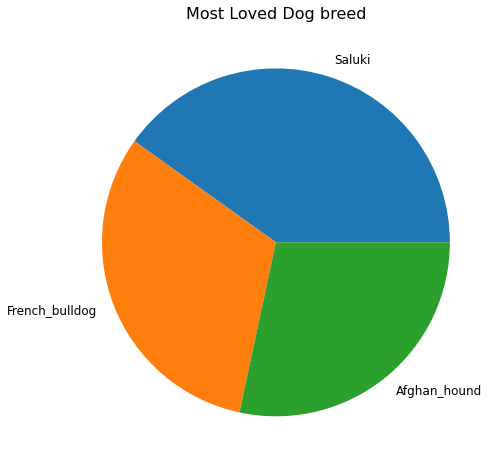

In [56]:
# Visualization
twitter_archive_master.groupby('dog_breed')['favorite_count'].mean().sort_values(ascending=False)[:3].plot(kind='pie', figsize=(8,8), 
                                                                                                    label='',fontsize=12);
plt.title('Most Loved Dog breed', fontsize=16);

#### What sort of correlation exist between the Retweets_Counts & Favourite_counts?

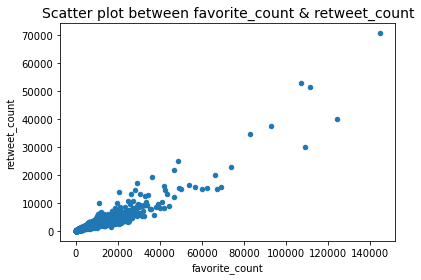

In [57]:
twitter_archive_master.plot(x='favorite_count', y= 'retweet_count', kind = 'scatter')
plt.title('Scatter plot between favorite_count & retweet_count', fontsize=14);

In [58]:
# using standard correlation coefficient (pearson) to confirm this correlation
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'], method='pearson')

0.9268096182747054

#### Which Dog_Breeds were highly rated by WeRateDogs?

In [59]:
twitter_archive_master.groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending=False)[:3]

dog_breed
Saluki             12.500000
briard             12.333333
Tibetan_mastiff    12.250000
Name: rating_numerator, dtype: float64

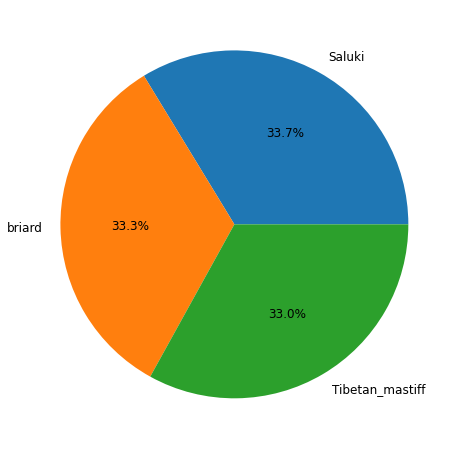

In [60]:
twitter_archive_master.groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending=False)[:3].plot(kind='pie', figsize=(8,8), label='',fontsize=12, autopct='%1.1f%%');

#### What is the distribution for the source of the Tweets by WeRateDogs?

In [61]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1415
Twitter Web Client      19
TweetDeck                6
Name: source, dtype: int64

### Insights:
1. The top three Dog breeds that are most loved judging by the Favorite Count are:
    * Saluki - with an Average Favorite Count of 20797
    * French_bulldog - with an Average Favorite Count of 16343
    * Afghan_hound - with an Average Favorite Count of 14705

2. There is strong correlation between Favourite Count & Retweet Count. Pearson correlation coefficient shows us a 92% correlation.

3. The top rated Dog breeds by WeRateDogs are:
    * Saluki  - with an Average Rating of 12.50
    * Briard  - with an Average Rating of 12.33
    * Tibetan_mastiff - with an Average Rating of 12.25
4. Twitter for iPhone was the predominant source used by WeRateDogs to share their Dog Rating.

### Final Words:

The data used for this analysis was the merged `twitter_archive_master` saved during the Storing stage of the Project. This was a combination of the cleaned `twitter_archive`, the cleaned `predictions` table and the `twitter_additions` that was extracted through the Twitter API. 